In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

* work_year: the year the salary was paid
* experience_level: the experience level in the job during the year 
* job_title: the role worked in during the year
* salary: salary (usd)
* employee_residence: distribution of number of employees according to place of residence
* remote_ratio: work remotely or in person
* company_location: company location

In [2]:
salary = pd.read_excel('salaries_dataa.xlsx')

In [107]:
salary.head()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [3]:
salary.shape

(6544, 10)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           6544 non-null   int64 
 1   experience_level    6544 non-null   object
 2   job_title           6544 non-null   object
 3   salary              6544 non-null   int64 
 4   salary_currency     6544 non-null   object
 5   salary_in_usd       6544 non-null   int64 
 6   employee_residence  6544 non-null   object
 7   remote_ratio        6544 non-null   int64 
 8   company_location    6544 non-null   object
 9   company_size        6544 non-null   object
dtypes: int64(4), object(6)
memory usage: 511.4+ KB


In [5]:
salary.isnull().sum()

work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,6544.000000,6544.000000,6544.000000,6544.000000
mean,2023.361400,157920.079004,157920.079004,32.235636
std,0.480443,71800.127671,71800.127671,46.663707
min,2023.000000,16000.000000,16000.000000,0.000000
25%,2023.000000,109000.000000,109000.000000,0.000000
50%,2023.000000,147500.000000,147500.000000,0.000000
75%,2024.000000,195000.000000,195000.000000,100.000000
max,2024.000000,800000.000000,800000.000000,100.000000


In [7]:
salary = salary.drop(columns=['salary_in_usd', 'salary_currency'])

In [8]:
salary.head(1)

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,AI Engineer,90000,AE,0,AE,L


### Column analysis

##### work_year and experience_level

<Figure size 1000x600 with 0 Axes>

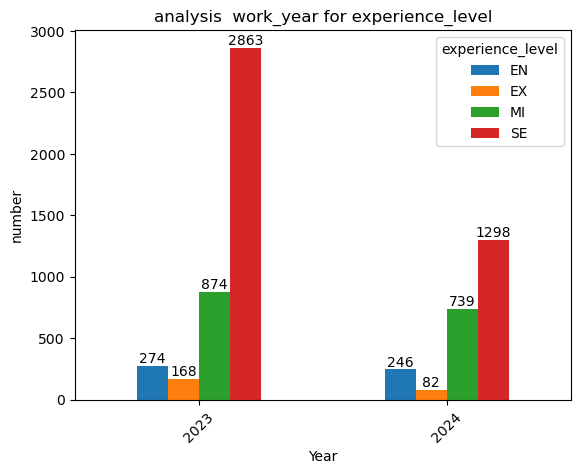

In [9]:

crosstab_salary_year = pd.crosstab(salary['work_year'], salary['experience_level'])

plt.figure(figsize=(10, 6))
barplot = crosstab_salary_year.plot(kind='bar', rot=0)
plt.title('analysis  work_year for experience_level')
plt.xlabel('Year')
plt.ylabel('number')
plt.xticks(rotation=45)

# add values in columns
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


* Note:
* EN: Entry-level or Junior-level, for people who are just starting out or have little work experience.
* MI: Mid-level is for those who have some experience
* SE: Senior-level is for people with vast experience
* EX: Executive-level or Director-level, for those holding senior management positions

#### salary

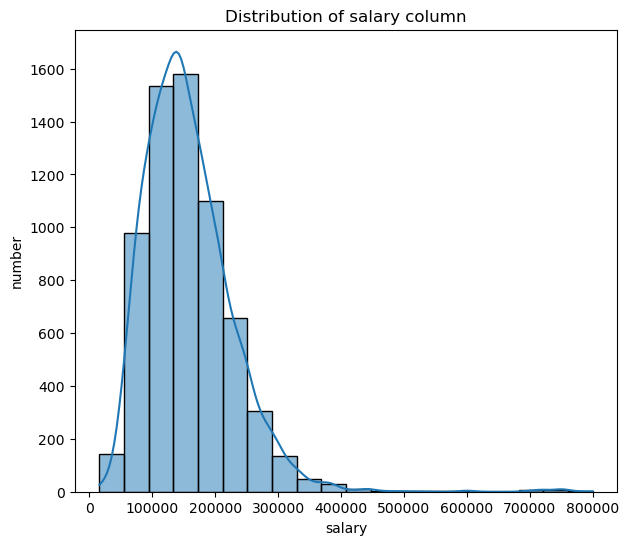

In [16]:
plt.figure(figsize=(7, 6))
sns.histplot(data=salary, x='salary', bins=20, kde=True)
plt.title('Distribution of salary column')
plt.xlabel('salary')
plt.ylabel('number')
plt.show()

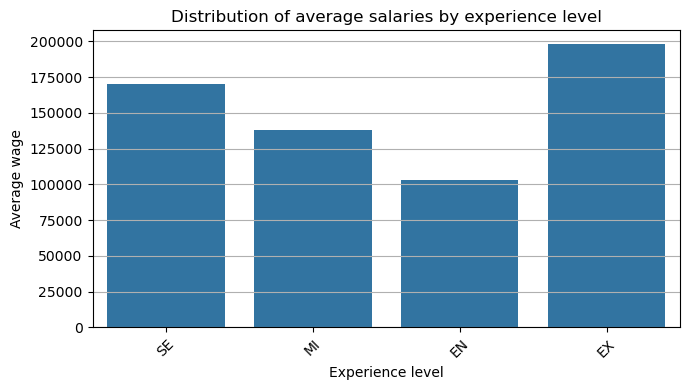

In [17]:

plt.figure(figsize=(7, 4))
sns.barplot(data=salary, x='experience_level', y='salary', ci=None, estimator=np.mean)
plt.title('Distribution of average salaries by experience level')
plt.xlabel('Experience level')
plt.ylabel('Average wage')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.tight_layout()
plt.show()


In [18]:
# calculate Q1, Q3
Q1 = salary['salary'].quantile(0.25)
Q3 = salary['salary'].quantile(0.75)
IQR = Q3 - Q1

# cal outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the number of outliers in the salary column
outlier_count = len(salary[(salary['salary'] < lower_bound) | (salary['salary'] > upper_bound)])

print("Total number of outliers in salary column:", outlier_count)



Total number of outliers in salary column: 122


In [19]:
# Filter rows that do not contain outliers in the salary column
salary_no_outliers = salary[(salary['salary'] >= lower_bound) & (salary['salary'] <= upper_bound)]

# Print out the number of lines after removing outliers
print("Number of lines after removing outliers:", len(salary_no_outliers))


Number of lines after removing outliers: 6422


#### Job_title

In [20]:

job_title_counts = salary['job_title'].value_counts()
print(job_title_counts)


Data Scientist                       1194
Data Engineer                        1190
Data Analyst                          888
Machine Learning Engineer             685
Analytics Engineer                    266
                                     ... 
Data Operations Associate               2
AI Research Engineer                    2
AI Software Engineer                    2
Data Management Consultant              2
Applied Machine Learning Engineer       2
Name: job_title, Length: 94, dtype: int64


In [21]:

for job_title, count in job_title_counts.items():
    print(job_title)


Data Scientist
Data Engineer
Data Analyst
Machine Learning Engineer
Analytics Engineer
Research Scientist
Data Architect
Research Engineer
Data Science
ML Engineer
Applied Scientist
Business Intelligence Analyst
Business Intelligence Engineer
Research Analyst
Data Manager
Machine Learning Scientist
AI Engineer
Data Science Manager
Data Specialist
BI Developer
Business Intelligence Developer
Data Science Consultant
Business Intelligence
Data Analytics Manager
Data Modeler
Head of Data
BI Analyst
Data Product Manager
Machine Learning Infrastructure Engineer
Computer Vision Engineer
Data Science Lead
Data Strategist
Data Lead
Data Science Engineer
Director of Data Science
AI Architect
Data Infrastructure Engineer
Data Developer
Machine Learning Researcher
Data Quality Analyst
MLOps Engineer
Business Intelligence Manager
Data Visualization Specialist
Prompt Engineer
ETL Developer
Data Integration Engineer
Data Management Analyst
Data Analytics Lead
Decision Scientist
AI Developer
Data Oper

In [24]:
# Create group variables
data_analyst =['Data Operations Analyst', 'Data Analytics Lead', 'Data Analytics Consultant', 'Data Management Analyst', 'Data Analyst', 'Data Strategist', 'Business Data Analyst', 'Data Quality Analyst', 'BI Analyst', 'BI Data Analyst', 'Data Architect', 'Data Analytics Specialist', 'Research Analyst', 'Data Analytics Manager', 'Compliance Data Analyst', 'Data Visualization Analyst']

data_scientist = ['Data Scientist', 'Research Scientist', 'Applied Scientist', 'Machine Learning Scientist', 'Principal Data Scientist', 'Data Science Director', 'Director of Data Science', 'Decision Scientist', 'Data Science', 'Data Science Manager', 'Data Specialist', 'Data Science Consultant', 'Head of Data', 'Data Product Manager', 'Data Science Lead', 'Data Science Engineer', 'Data Visualization Specialist', 'Head of Data Science', 'Data Management Consultant', 'Big Data Engineer', 'Data Science Practitioner']


data_engineer = ['Data Engineer', 'Cloud Database Engineer', 'ML Engineer', 'Data Integration Engineer', 'Data Infrastructure Engineer', 'Data Modeler', 'Data Pipeline Engineer', 'Data Integration Developer', 'Data Operations Engineer', 'Data Integration Specialist', 'Machine Learning Infrastructure Engineer', 'Data Quality Engineer', 'Machine Learning Software Engineer', 'Research Engineer', 'Data Manager', 'Data Lead', 'Data Developer', 'ETL Developer', 'Data Operations Specialist', 'Data Visualization Engineer', 'AI Research Engineer']

machine_learning = ['Machine Learning Engineer', 'AI Engineer', 'Prompt Engineer', 'AI Architect', 'AI Software Engineer', 'Robotics Software Engineer', 'AI Programmer', 'Head of Machine Learning', 'Machine Learning Operations Engineer', 'MLOps Engineer', 'ML Ops Engineer', 'AI Scientist', 'Computer Vision Engineer', 'Machine Learning Specialist', 'Deep Learning Engineer', 'Machine Learning Researcher', 'AI Developer', 'NLP Engineer', 'Robotics Engineer', 'AI Product Manager', 'Machine Learning Modeler', 'Applied Machine Learning Engineer']


business_intelligence = ['Business Intelligence Developer', 'Analytics Engineer', 'Business Intelligence Analyst', 'Business Intelligence', 'Business Intelligence Lead', 'Business Intelligence Manager', 'Data Management Specialist', 'Data Operations Associate', 'Data Operations Manager', 'Business Intelligence Engineer', 'BI Developer', 'Business Intelligence Specialist', 'Data Strategy Manager', 'Financial Data Analyst']


# Create a new column 'job_category' and assign values to each group
salary.loc[salary['job_title'].isin(data_analyst), 'job_category'] = 'Data Analyst'
salary.loc[salary['job_title'].isin(data_scientist), 'job_category'] = 'Data Scientist'
salary.loc[salary['job_title'].isin(data_engineer), 'job_category'] = 'Data Engineer'
salary.loc[salary['job_title'].isin(machine_learning), 'job_category'] = 'Machine Learning'
salary.loc[salary['job_title'].isin(business_intelligence), 'job_category'] = 'Business Intelligence'

print(salary[['job_title', 'job_category']].head())

                   job_title      job_category
0                AI Engineer  Machine Learning
1  Machine Learning Engineer  Machine Learning
2  Machine Learning Engineer  Machine Learning
3  Machine Learning Engineer  Machine Learning
4  Machine Learning Engineer  Machine Learning


In [25]:
data_analyst = list(set(data_analyst))
print(data_analyst)


['Data Management Analyst', 'Research Analyst', 'Data Visualization Analyst', 'Data Analytics Specialist', 'Compliance Data Analyst', 'Data Operations Analyst', 'Data Analyst', 'Data Quality Analyst', 'Data Analytics Manager', 'Data Architect', 'BI Analyst', 'BI Data Analyst', 'Data Strategist', 'Business Data Analyst', 'Data Analytics Consultant', 'Data Analytics Lead']


In [26]:
data_analyst = list(set(data_scientist))
print(data_scientist)


['Data Scientist', 'Research Scientist', 'Applied Scientist', 'Machine Learning Scientist', 'Principal Data Scientist', 'Data Science Director', 'Director of Data Science', 'Decision Scientist', 'Data Science', 'Data Science Manager', 'Data Specialist', 'Data Science Consultant', 'Head of Data', 'Data Product Manager', 'Data Science Lead', 'Data Science Engineer', 'Data Visualization Specialist', 'Head of Data Science', 'Data Management Consultant', 'Big Data Engineer', 'Data Science Practitioner']


In [27]:
data_analyst = list(set(data_engineer))
print(data_engineer)


['Data Engineer', 'Cloud Database Engineer', 'ML Engineer', 'Data Integration Engineer', 'Data Infrastructure Engineer', 'Data Modeler', 'Data Pipeline Engineer', 'Data Integration Developer', 'Data Operations Engineer', 'Data Integration Specialist', 'Machine Learning Infrastructure Engineer', 'Data Quality Engineer', 'Machine Learning Software Engineer', 'Research Engineer', 'Data Manager', 'Data Lead', 'Data Developer', 'ETL Developer', 'Data Operations Specialist', 'Data Visualization Engineer', 'AI Research Engineer']


In [28]:
data_analyst = list(set(machine_learning))
print(machine_learning)


['Machine Learning Engineer', 'AI Engineer', 'Prompt Engineer', 'AI Architect', 'AI Software Engineer', 'Robotics Software Engineer', 'AI Programmer', 'Head of Machine Learning', 'Machine Learning Operations Engineer', 'MLOps Engineer', 'ML Ops Engineer', 'AI Scientist', 'Computer Vision Engineer', 'Machine Learning Specialist', 'Deep Learning Engineer', 'Machine Learning Researcher', 'AI Developer', 'NLP Engineer', 'Robotics Engineer', 'AI Product Manager', 'Machine Learning Modeler', 'Applied Machine Learning Engineer']


In [29]:
data_analyst = list(set(business_intelligence))
print(business_intelligence)


['Business Intelligence Developer', 'Analytics Engineer', 'Business Intelligence Analyst', 'Business Intelligence', 'Business Intelligence Lead', 'Business Intelligence Manager', 'Data Management Specialist', 'Data Operations Associate', 'Data Operations Manager', 'Business Intelligence Engineer', 'BI Developer', 'Business Intelligence Specialist', 'Data Strategy Manager', 'Financial Data Analyst']


In [30]:
# Create group variables
data_analyst =['Data Operations Analyst', 'Data Analytics Lead', 'Data Analytics Consultant', 'Data Management Analyst', 'Data Analyst', 'Data Strategist', 'Business Data Analyst', 'Data Quality Analyst', 'BI Analyst', 'BI Data Analyst', 'Data Architect', 'Data Analytics Specialist', 'Research Analyst', 'Data Analytics Manager', 'Compliance Data Analyst', 'Data Visualization Analyst']

data_scientist = ['Data Scientist', 'Research Scientist', 'Applied Scientist', 'Machine Learning Scientist', 'Principal Data Scientist', 'Data Science Director', 'Director of Data Science', 'Decision Scientist', 'Data Science', 'Data Science Manager', 'Data Specialist', 'Data Science Consultant', 'Head of Data', 'Data Product Manager', 'Data Science Lead', 'Data Science Engineer', 'Data Visualization Specialist', 'Head of Data Science', 'Data Management Consultant', 'Big Data Engineer', 'Data Science Practitioner']


data_engineer = ['Data Engineer', 'Cloud Database Engineer', 'ML Engineer', 'Data Integration Engineer', 'Data Infrastructure Engineer', 'Data Modeler', 'Data Pipeline Engineer', 'Data Integration Developer', 'Data Operations Engineer', 'Data Integration Specialist', 'Machine Learning Infrastructure Engineer', 'Data Quality Engineer', 'Machine Learning Software Engineer', 'Research Engineer', 'Data Manager', 'Data Lead', 'Data Developer', 'ETL Developer', 'Data Operations Specialist', 'Data Visualization Engineer', 'AI Research Engineer']

machine_learning = ['Machine Learning Engineer', 'AI Engineer', 'Prompt Engineer', 'AI Architect', 'AI Software Engineer', 'Robotics Software Engineer', 'AI Programmer', 'Head of Machine Learning', 'Machine Learning Operations Engineer', 'MLOps Engineer', 'ML Ops Engineer', 'AI Scientist', 'Computer Vision Engineer', 'Machine Learning Specialist', 'Deep Learning Engineer', 'Machine Learning Researcher', 'AI Developer', 'NLP Engineer', 'Robotics Engineer', 'AI Product Manager', 'Machine Learning Modeler', 'Applied Machine Learning Engineer']


business_intelligence = ['Business Intelligence Developer', 'Analytics Engineer', 'Business Intelligence Analyst', 'Business Intelligence', 'Business Intelligence Lead', 'Business Intelligence Manager', 'Data Management Specialist', 'Data Operations Associate', 'Data Operations Manager', 'Business Intelligence Engineer', 'BI Developer', 'Business Intelligence Specialist', 'Data Strategy Manager', 'Financial Data Analyst']

all_fields = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Research Scientist', 'Data Architect', 'Research Engineer', 'Data Science', 'ML Engineer', 'Applied Scientist', 'Business Intelligence Analyst', 'Business Intelligence Engineer', 'Research Analyst', 'Data Manager', 'Machine Learning Scientist', 'AI Engineer', 'Data Science Manager', 'Data Specialist', 'BI Developer', 'Business Intelligence Developer', 'Data Science Consultant', 'Business Intelligence', 'Data Analytics Manager', 'Data Modeler', 'Head of Data', 'BI Analyst', 'Data Product Manager', 'Machine Learning Infrastructure Engineer', 'Computer Vision Engineer', 'Data Science Lead', 'Data Strategist', 'Data Lead', 'Data Science Engineer', 'Director of Data Science', 'AI Architect', 'Data Infrastructure Engineer', 'Data Developer', 'Machine Learning Researcher', 'Data Quality Analyst', 'MLOps Engineer', 'Business Intelligence Manager', 'Data Visualization Specialist', 'Prompt Engineer', 'ETL Developer', 'Data Integration Engineer', 'Data Management Analyst', 'Data Analytics Lead', 'Decision Scientist', 'AI Developer', 'Data Operations Analyst', 'Data Science Practitioner', 'Data Operations Specialist', 'Data Integration Specialist', 'Robotics Software Engineer', 'Data Management Specialist', 'AI Scientist', 'Machine Learning Software Engineer', 'NLP Engineer', 'Data Operations Engineer', 'Deep Learning Engineer', 'Data Analytics Specialist', 'Data Analytics Consultant', 'Head of Machine Learning', 'BI Data Analyst', 'Machine Learning Operations Engineer', 'Business Data Analyst', 'Cloud Database Engineer', 'Business Intelligence Specialist', 'Data Visualization Engineer', 'Robotics Engineer', 'Head of Data Science', 'Data Science Director', 'Data Integration Developer', 'Business Intelligence Lead', 'AI Programmer', 'Data Strategy Manager', 'AI Product Manager', 'Compliance Data Analyst', 'Machine Learning Specialist', 'Data Visualization Analyst', 'Data Operations Manager', 'Principal Data Scientist', 'Big Data Engineer', 'Financial Data Analyst', 'Data Quality Engineer', 'Machine Learning Modeler', 'Data Pipeline Engineer', 'ML Ops Engineer', 'Data Operations Associate', 'AI Research Engineer', 'AI Software Engineer', 'Data Management Consultant', 'Applied Machine Learning Engineer']


# Find industries that are not listed in the major industry lists
missing_fields = [field for field in all_fields if field not in data_analyst + data_scientist + data_engineer + machine_learning + business_intelligence]


print(missing_fields)


[]


In [32]:
# Count the number of values in each list
num_data_analyst = len(data_analyst)
num_data_scientist = len(data_scientist)
num_data_engineer = len(data_engineer)
num_machine_learning = len(machine_learning)
num_business_intelligence = len(business_intelligence)


print("Number of sectors in data_analyst:", num_data_analyst)
print("Number of sectors in data_scientist:", num_data_scientist)
print("Number of sectors in data_engineer:", num_data_engineer)
print("Number of sectors in machine_learning:", num_machine_learning)
print("Number of sectors in business_intelligence:", num_business_intelligence)


Number of sectors in data_analyst: 16
Number of sectors in data_scientist: 21
Number of sectors in data_engineer: 21
Number of sectors in machine_learning: 22
Number of sectors in business_intelligence: 14


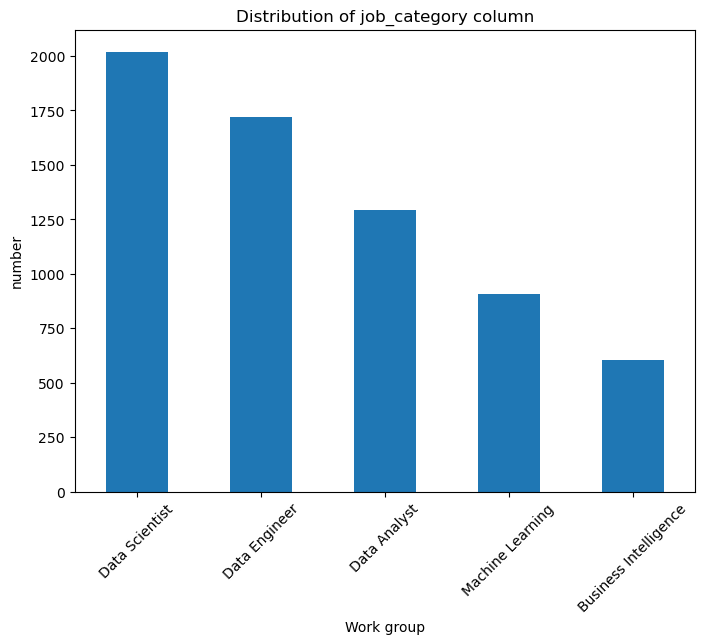

In [33]:

job_category_counts = salary['job_category'].value_counts()

plt.figure(figsize=(8, 6))
job_category_counts.plot(kind='bar')
plt.title('Distribution of job_category column')
plt.xlabel('Work group')
plt.ylabel('number')
plt.xticks(rotation=45)
plt.show()


#### employee_residence

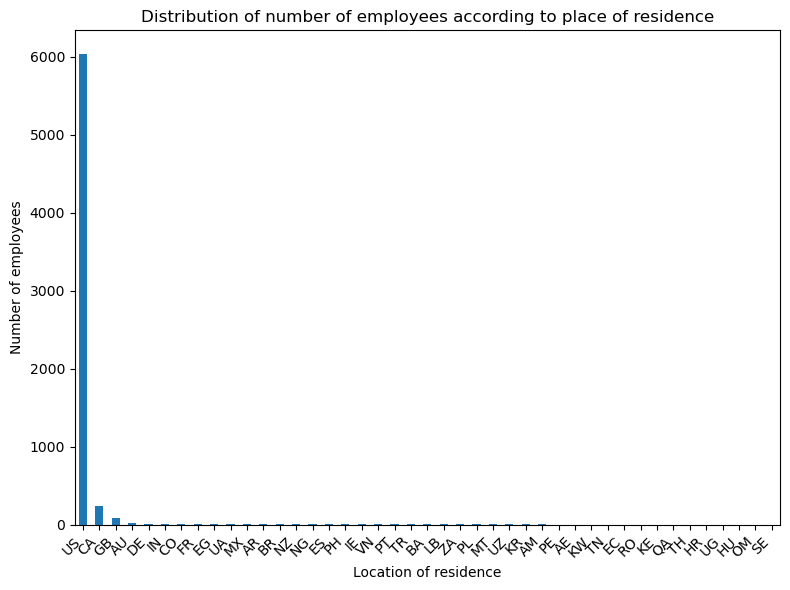

US    6038
CA     241
GB      87
AU      26
DE      13
IN      12
CO      12
FR      11
EG      11
UA      10
MX      10
AR       8
BR       6
NZ       4
NG       4
ES       4
PH       4
IE       4
VN       3
PT       3
TR       3
BA       2
LB       2
ZA       2
PL       2
MT       2
UZ       2
KR       2
AM       2
PE       1
AE       1
KW       1
TN       1
EC       1
RO       1
KE       1
QA       1
TH       1
HR       1
UG       1
HU       1
OM       1
SE       1
Name: employee_residence, dtype: int64


In [34]:

residence_counts = salary['employee_residence'].value_counts()


plt.figure(figsize=(8, 6))
residence_counts.plot(kind='bar')
plt.title('Distribution of number of employees according to place of residence')
plt.xlabel('Location of residence')
plt.ylabel('Number of employees')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

country_counts = salary['employee_residence'].value_counts()
print(country_counts)


* Note: US: Hoa Kỳ (United States), CA: Canada, GB: Vương quốc Anh (United Kingdom),  AU: Australia,  DE: Đức (Germany), IN: Ấn Độ (India),  CO: Colombia, FR: Pháp (France), EG: Ai Cập (Egypt), UA: Ukraina, MX: Mexico, AR: Argentina, BR: Brasil (Brazil),  NZ: New Zealand, NG: Nigeria, ES: Tây Ban Nha (Spain), PH: Philippines, IE: Ireland, VN: Việt Nam,  PT: Bồ Đào Nha (Portugal), TR: Thổ Nhĩ Kỳ (Turkey), BA: Bosnia và Herzegovina,  LB: Lebanon,  ZA: Nam Phi (South Africa), PL: Ba Lan (Poland), MT: Malta, UZ: Uzbekistan, KR: Hàn Quốc (South Korea),  AM: Armenia, PE: Peru, AE: Các Tiểu vương quốc Ả Rập(United Arab Emirates), KW: Kuwait, TN: Tunisia, EC: Ecuador,RO: Romania, KE: Kenya, QA: Qatar, TH: Thái Lan (Thailand), HR: Croatia,  UG: Uganda, HU: Hungary, OM: Oman,  SE: Thụy Điển (Sweden)

#### remote_ratio

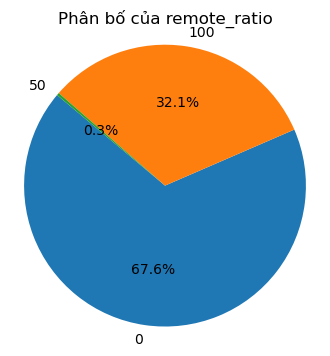

0      4425
100    2100
50       19
Name: remote_ratio, dtype: int64


In [35]:

group_counts = salary['remote_ratio'].value_counts()


labels = group_counts.index

# Get the values of the chart
sizes = group_counts.values


plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Phân bố của remote_ratio')

plt.axis('equal')
plt.show()

number = salary['remote_ratio'].value_counts()
print(number)


* Note: 0 No remote work (less than 20%),  50 Partially remote,  100 Fully remote (more than 80%)

#### company_location

Unique company locations: ['AE' 'US' 'AU' 'UA' 'CA' 'EG' 'GB' 'PH' 'TR' 'OM' 'NZ' 'FR' 'MX' 'BA'
 'BR' 'AR' 'DE' 'AS' 'IE' 'MT' 'LB' 'RO' 'IN' 'HU' 'VN' 'ZA' 'PL' 'NL'
 'PT' 'CO' 'RU' 'KR' 'QA' 'KE' 'EC' 'JP' 'NG' 'ES' 'SE' 'AM']
Number of unique countries: 40
US    6051
CA     240
GB      87
AU      27
DE      14
CO      12
FR      12
EG      10
MX      10
UA       9
IN       8
BR       6
AR       6
PH       4
NZ       4
ES       4
IE       4
PT       3
VN       3
NG       3
PL       2
ZA       2
LB       2
MT       2
BA       2
TR       2
KR       2
JP       1
QA       1
EC       1
SE       1
KE       1
AE       1
RU       1
NL       1
HU       1
RO       1
AS       1
OM       1
AM       1
Name: company_location, dtype: int64


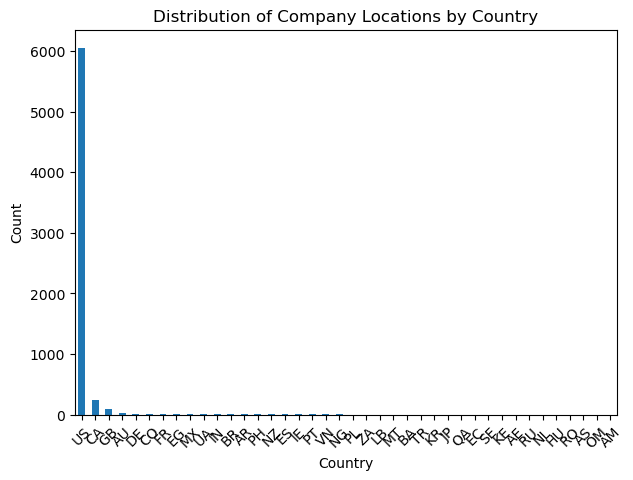

In [36]:

# Check for unique values
unique_locations = salary['company_location'].unique()
print("Unique company locations:", unique_locations)

# Distribution of countries
country_counts = salary['company_location'].value_counts()
print("Number of unique countries:", len(country_counts))
print(country_counts)

# Plot the distribution of countries
plt.figure(figsize=(7, 5))
country_counts.plot(kind='bar')
plt.title('Distribution of Company Locations by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* Comment: The 5 countries with the most headquarters are US: Hoa Kỳ (United States), CA: Canada, GB: Vương quốc Anh (United Kingdom), AU: Australia.

### Location with the largest number of employees

In [37]:
# Count the number of employees at each company location
location_counts = salary['company_location'].value_counts()

# Identify the location with the largest number of employees
most_common_location = location_counts.idxmax()
num_employees_most_common_location = location_counts.max()

print("Most common company location:", most_common_location)
print("Number of employees at most common location:", num_employees_most_common_location)


Most common company location: US
Number of employees at most common location: 6051


### company_size

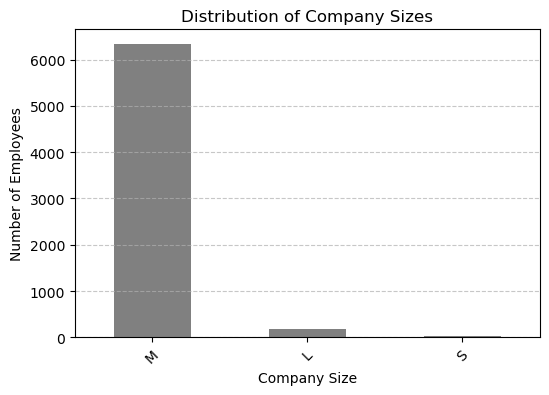

In [38]:

company_size_counts = salary['company_size'].value_counts()

# Visualize the distribution of column "company_size"
plt.figure(figsize=(6, 4))
company_size_counts.plot(kind='bar', color='grey')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* Note: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

<Figure size 1000x600 with 0 Axes>

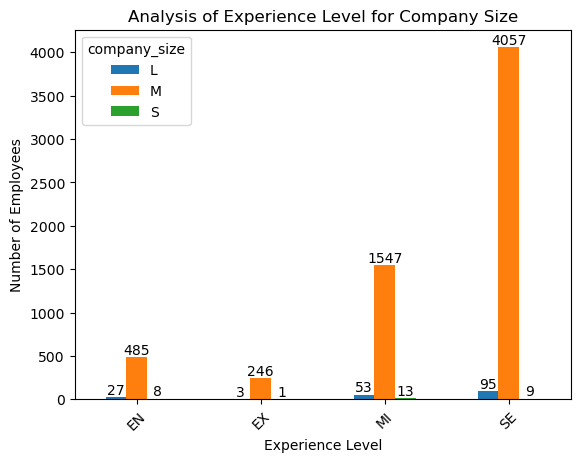

In [39]:

crosstab_salary_size = pd.crosstab(salary['experience_level'], salary['company_size'])

plt.figure(figsize=(10, 6))
barplot = crosstab_salary_size.plot(kind='bar', rot=0)
plt.title('Analysis of Experience Level for Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


<Figure size 1000x600 with 0 Axes>

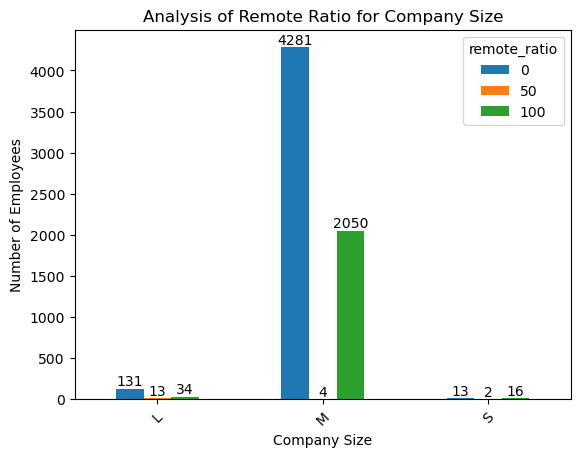

In [40]:
# Create cross table between 'company_size' and 'remote_ratio'
crosstab_size_remote = pd.crosstab(salary['company_size'], salary['remote_ratio'])

plt.figure(figsize=(10, 6))
barplot = crosstab_size_remote.plot(kind='bar', rot=0)
plt.title('Analysis of Remote Ratio for Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

# Add values to the column
for p in barplot.patches:
    barplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


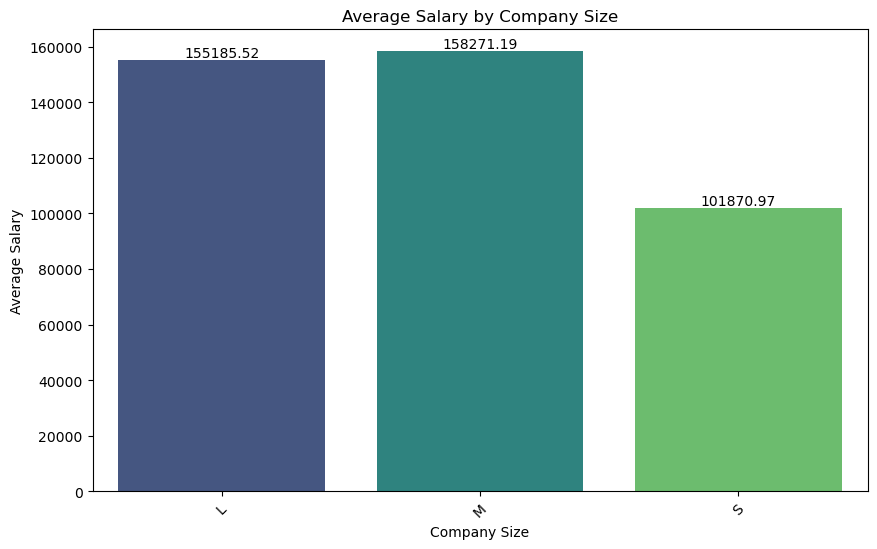

In [41]:
# Calculate average salary according to company size
avg_salary_by_size = salary.groupby('company_size')['salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=avg_salary_by_size, x='company_size', y='salary', palette='viridis')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)

# Add average value on column
for index, value in enumerate(avg_salary_by_size['salary']):
    barplot.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()


### Category feature

In [42]:
salary.head(1)

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size,job_category
0,2024,SE,AI Engineer,90000,AE,0,AE,L,Machine Learning


In [43]:
salary.experience_level.replace({"EN":1,"MI":2,"SE":3,"EX":4},inplace=True)

In [44]:
salary.company_size.replace({"M":1,"S":2,"L":3},inplace=True)

In [45]:
def not_usa(x):
    if x!='US':
        return 0
    return 1
salary['company_location_fact'] = salary['company_location'].apply(not_usa)

In [46]:
def not_usa(x):
    if x!='US':
        return 0
    return 1
salary['employee_residence_fact'] = salary['employee_residence'].apply(not_usa)

In [47]:


print(salary[['job_title', 'job_category']].head())


                   job_title      job_category
0                AI Engineer  Machine Learning
1  Machine Learning Engineer  Machine Learning
2  Machine Learning Engineer  Machine Learning
3  Machine Learning Engineer  Machine Learning
4  Machine Learning Engineer  Machine Learning


In [48]:
salary.job_category.replace({'Data Analyst':1,'Data Scientist':2,'Data Engineer':3,'Machine Learning':4, 'Business Intelligence': 5},inplace=True)

In [49]:
salary.head(1)

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_fact,employee_residence_fact
0,2024,3,AI Engineer,90000,AE,0,AE,3,4,0,0


In [50]:
salary.drop({"job_title", "employee_residence", "company_location"}, axis=1, inplace=True)


In [51]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   work_year                6544 non-null   int64
 1   experience_level         6544 non-null   int64
 2   salary                   6544 non-null   int64
 3   remote_ratio             6544 non-null   int64
 4   company_size             6544 non-null   int64
 5   job_category             6544 non-null   int64
 6   company_location_fact    6544 non-null   int64
 7   employee_residence_fact  6544 non-null   int64
dtypes: int64(8)
memory usage: 409.1 KB
